In [8]:
# import necessary libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image

In [14]:
weights1_path = '/content/drive/MyDrive/Complaint Management/yolov3-helmet.weights'
configuration1_path = '/content/drive/MyDrive/Complaint Management/yolov3-helmet.cfg'

In [16]:
network1 = cv2.dnn.readNetFromDarknet(configuration1_path, weights1_path)
layers_names1_all = network1.getLayerNames()
layers_names1_output = [layers_names1_all[i[0]-1] for i in network1.getUnconnectedOutLayers()]
labels1 = open('/content/drive/MyDrive/Complaint Management/helmet.names').read().strip().split('\n')
print(labels1)

['Helmet']


In [32]:
image_input = cv2.imread('/content/motorcycle.jpeg')
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network1.setInput(blob)
output_from_network1 = network1.forward(layers_names1_output)
np.random.seed(42)
colours1 = np.random.randint(0,255,size=(len(labels1),3),dtype='uint8')

bounding_boxes1 = []
confidences1 = []
class_numbers1 = []

h,w = image_input.shape[:2]
            
for result in output_from_network1:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes1.append([x_min,y_min,int(box_width),int(box_height)])
            confidences1.append(float(confidence_current))
            class_numbers1.append(class_current)

results1 = cv2.dnn.NMSBoxes(bounding_boxes1,confidences1,probability_minimum,threshold)

if len(results1) > 0:
    for i in results1.flatten():
        x_min,y_min=bounding_boxes1[i][0],bounding_boxes1[i][1]
        box_width,box_height= bounding_boxes1[i][2],bounding_boxes1[i][3]
        colour_box_current=[int(j) for j in colours1[class_numbers1[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
        text_box_current1='{}: {:.4f}'.format(labels1[int(class_numbers1[i])],confidences1[i])
        cv2.putText(image_input,text_box_current1,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

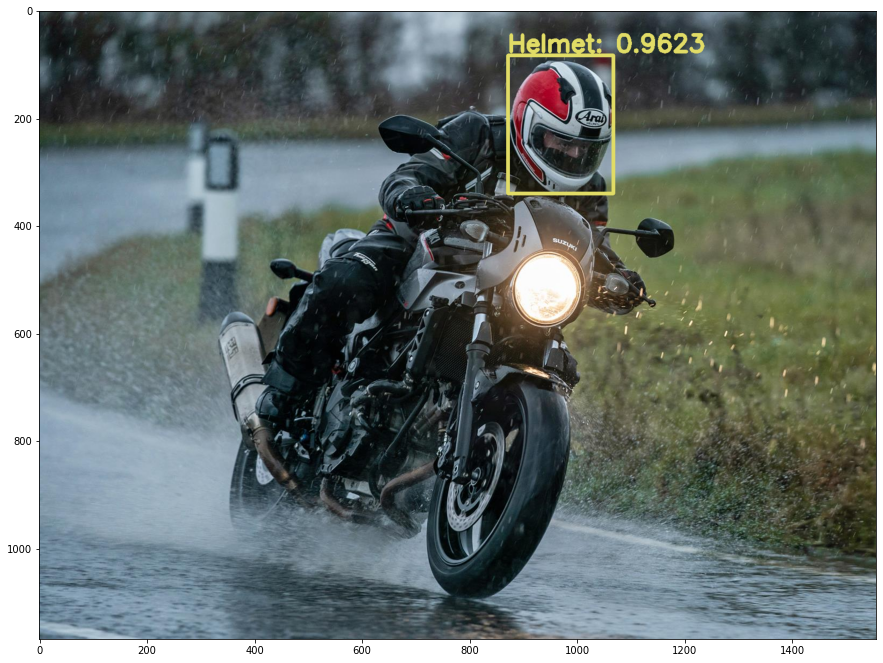

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
results1

array([[0]], dtype=int32)